In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
from nltk import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

Cleaning function

In [60]:
def text_prepering(x: str)-> str:
    x = re.sub('([;:]+[)(><-]+)', ' ', x)
    x = x.lower()
    x = re.sub(r'\d', ' ', x)
    x = re.sub('<[^>]+>', ' ', x)
    x = re.sub(r'[^\w\s]+', ' ', x)
    x = re.sub(r'\s{2,}', ' ', x)
    return x


def cleaning_words(tekst: list) -> list:
    stop_words = stopwords.words("english")
    lista: list = []
    for word in tekst:
        if word not in stop_words:
            lista.append(word)
    return lista


def stemming(wyrazenie: str) -> list:
    porter = PorterStemmer()
    list_tekst = wyrazenie.split(' ')
    return [porter.stem(word) for word in list_tekst]


def longer_words(lista: list) -> list:
    lista_nowa = []
    for word in lista:
        if len(word) > 3:
            lista_nowa.append(word)
    return lista_nowa


def bag_of_words(words: list) -> dict:
    bow = {}
    for word in words:
        if word not in bow.keys():
            bow[word] = 1
        else:
            bow[word] += 1
    return bow


def text_tokenizer(text) -> list:
    tekst = text_prepering(text)
    tekst = stemming(tekst)
    tekst = cleaning_words(tekst)
    tekst = longer_words(tekst)
    return tekst

def wordcloud(bow: list, title: str):
    bow = bag_of_words(bow)
    wc = WordCloud()
    wc.generate_from_frequencies(bow)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

In [61]:
df = pd.read_csv('Datasets/alexa_reviews.csv', sep=";", encoding='cp1252', usecols=['rating', 'verified_reviews'])

In [62]:
print(df.head())

   rating                                   verified_reviews
0       5                                      Love my Echo!
1       5                                          Loved it!
2       4  Sometimes while playing a game, you can answer...
3       5  I have had a lot of fun with this thing. My 4 ...
4       5                                              Music


Czyszczenie i stemming

In [63]:
df_wordcloud = " ".join(x for x in df.verified_reviews)
df_wordcloud = text_tokenizer(df_wordcloud)

Wordcloud

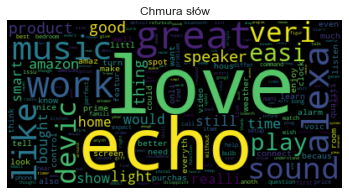

In [64]:
wordcloud(df_wordcloud, "Chmura słów")

Przyklad chmury gdy rating jest rowne 1

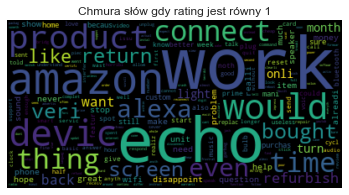

In [65]:
df_1 = df[df['rating'] == 1]
df_1 = " ".join(x for x in df_1.verified_reviews)
df_1 = text_tokenizer(df_1)
wordcloud(df_1, "Chmura słów gdy rating jest równy 1")

Klasyfikatory

In [66]:
vectorizer_count = CountVectorizer(tokenizer=text_tokenizer)
count_transform = vectorizer_count.fit_transform(df['verified_reviews'])

In [69]:
x_train, x_test, y_train, y_test = train_test_split(count_transform, df['rating'], test_size=0.3, random_state=42, stratify = df['rating'])

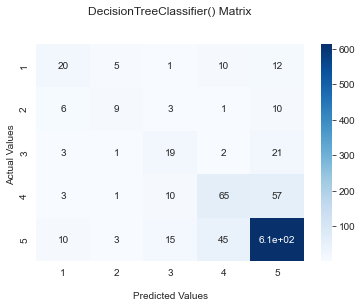

              precision    recall  f1-score   support

           5       0.86      0.89      0.88       686
           4       0.53      0.48      0.50       136
           3       0.40      0.41      0.40        46
           2       0.47      0.31      0.38        29
           1       0.48      0.42      0.44        48

    accuracy                           0.77       945
   macro avg       0.55      0.50      0.52       945
weighted avg       0.76      0.77      0.76       945



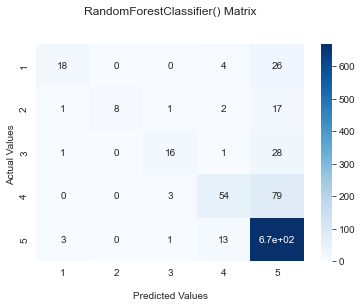

              precision    recall  f1-score   support

           5       0.82      0.98      0.89       686
           4       0.73      0.40      0.51       136
           3       0.76      0.35      0.48        46
           2       1.00      0.28      0.43        29
           1       0.78      0.38      0.51        48

    accuracy                           0.81       945
   macro avg       0.82      0.47      0.56       945
weighted avg       0.81      0.81      0.78       945



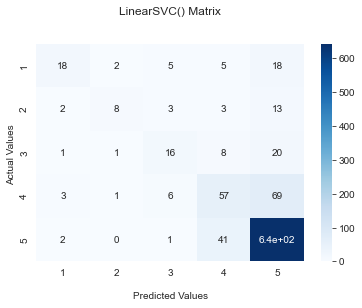

              precision    recall  f1-score   support

           5       0.84      0.94      0.89       686
           4       0.50      0.42      0.46       136
           3       0.52      0.35      0.42        46
           2       0.67      0.28      0.39        29
           1       0.69      0.38      0.49        48

    accuracy                           0.78       945
   macro avg       0.64      0.47      0.53       945
weighted avg       0.76      0.78      0.77       945



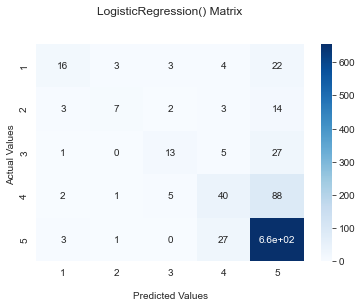

              precision    recall  f1-score   support

           5       0.81      0.95      0.88       686
           4       0.51      0.29      0.37       136
           3       0.57      0.28      0.38        46
           2       0.58      0.24      0.34        29
           1       0.64      0.33      0.44        48

    accuracy                           0.77       945
   macro avg       0.62      0.42      0.48       945
weighted avg       0.74      0.77      0.74       945



In [71]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(),
                   LinearSVC(), LogisticRegression()]

for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title(f'{clf} Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['1','2', '3', '4', '5'])
    ax.yaxis.set_ticklabels(['1','2', '3', '4', '5'])
    plt.show()
    print(classification_report(y_test, y_pred, labels=df["rating"].unique()))

Opis dla Random Forecast (lasów losowych):
Recall:
Ok. 98% spośród wszystkich rekordów z rzeczywistym label “5” zostały oznaczone poprawnie.
Ok. 42% spośród wszystkich rekordów z rzeczywistym label “4” zostały oznaczone poprawnie.
Ok. 35% spośród wszystkich rekordów z rzeczywistym label “3” zostały oznaczone poprawnie.
Ok. 28% spośród wszystkich rekordów z rzeczywistym label “2” zostały oznaczone poprawnie.
Ok. 35% spośród wszystkich rekordów z rzeczywistym label “1” zostały oznaczone poprawnie.

Precision:
Ok. 82% spośród rekordów, które klasyfikator określił jako “5”, zostały oznaczone poprawnie.
Ok. 76% spośród rekordów, które klasyfikator określił jako “4”, zostały oznaczone poprawnie.
Ok. 73% spośród rekordów, które klasyfikator określił jako “3”, zostały oznaczone poprawnie.
Ok. 100% spośród rekordów, które klasyfikator określił jako “2”, zostały oznaczone poprawnie.
Ok. 81% spośród rekordów, które klasyfikator określił jako “1”, zostały oznaczone poprawnie.

Accuracy dla tego modelu wyniosło 0.81, co oznacza, że jego dokładność wynosi około 81%. POd tym względem klasyfikator losowe lasy jest najlepszy.